In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data_url = 'StudentsPerformance.csv'

df = pd.read_csv(data_url,skipinitialspace=True,header=0)

StudentsPerformance=df.dropna()

StudentsPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


We want to calculate total score .

In [2]:
StudentsPerformance['Total_Score'] = StudentsPerformance['math score']+StudentsPerformance['reading score']+StudentsPerformance['writing score']
StudentsPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


lets see if there is a relationship between test preparation course and Total score.

The null Hypothesis is there is no relationship between test preparation course and Total score students obtained. And the alternative Hypothesis is there is a relationship between test preparation course and total score students obtained. 

Ho: There is no relationship between pre_course and Total score.

Ha: There is a relationship between pre_course and Total score. .

In [3]:
pre_course = StudentsPerformance['test preparation course'].value_counts()
pre_course

none         642
completed    358
Name: test preparation course, dtype: int64

In [4]:
per_pre_course= StudentsPerformance['test preparation course'].value_counts(normalize=True)*100
per_pre_course

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

In [5]:
Tot_Score = StudentsPerformance['Total_Score'].value_counts()
Tot_Score

204    15
198    14
232    14
205    13
210    12
       ..
277     1
95      1
112     1
27      1
55      1
Name: Total_Score, Length: 194, dtype: int64

In [6]:
Per_Tot_Score = StudentsPerformance['Total_Score'].value_counts(normalize=True)*100
Per_Tot_Score 

204    1.5
198    1.4
232    1.4
205    1.3
210    1.2
      ... 
277    0.1
95     0.1
112    0.1
27     0.1
55     0.1
Name: Total_Score, Length: 194, dtype: float64

In [7]:
pd.crosstab(index= StudentsPerformance['test preparation course'], columns= StudentsPerformance['Total_Score'])

Total_Score,27,55,69,70,78,88,89,90,92,93,94,95,97,103,104,112,113,114,115,116,117,118,119,120,122,123,124,126,127,129,130,131,132,133,134,135,136,137,138,139,...,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,287,288,289,290,291,292,293,296,297,299,300
test preparation course,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
completed,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,2,0,0,1,1,0,1,0,1,0,...,1,0,2,3,2,3,2,3,1,1,1,1,1,5,2,1,2,1,1,1,2,6,1,1,2,0,1,0,3,1,1,1,0,2,1,3,2,1,1,1
none,1,1,1,1,2,1,2,1,1,1,1,1,1,0,2,1,0,1,2,1,2,1,2,2,2,1,1,1,0,2,2,2,2,0,3,2,1,1,2,5,...,3,4,2,3,2,3,2,3,4,1,1,4,4,0,2,1,0,2,0,0,1,0,1,0,1,1,1,1,1,1,0,2,1,0,1,0,0,1,0,2


In [8]:
from scipy.stats import chi2_contingency
g, p_value, dof, expctd= chi2_contingency(pd.crosstab(index= StudentsPerformance['test preparation course'], columns= StudentsPerformance['Total_Score']), )
print(g)
print(p_value)
print(dof)


237.3069873983569
0.016344050879986458
193


we reject the null hypothesis and conclude that there is a relationship between test preparation course and total score.

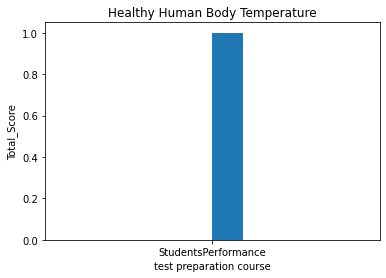

In [11]:

fig, ax = plt.subplots()
ax.hist('StudentsPerformance')
ax.set_xlabel('test preparation course') 
ax.set_ylabel('Total_Score') 
ax.set_title('Healthy Human Body Temperature') 

plt.show()